In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time, warnings
import datetime as dt

In [2]:
leads_1= pd.read_csv(r'C:\Users\kuldi\Downloads\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv')
leads_1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads_1.shape

(9240, 37)

In [4]:
leads_1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
leads_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Data Cleaning and Preparation

In [6]:
leads_1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

as we see there are a lot of columns which have high number of missing values.

In [7]:
#checking percentage of null values in each column

round(100*(leads_1.isnull().sum()/len(leads_1.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [8]:
#dropping cols with more than 45% missing values

cols=leads_1.columns

for i in cols:
    if((100*(leads_1[i].isnull().sum()/len(leads_1.index))) >= 45):
        leads_1.drop(i, 1, inplace = True)

C:\Users\kuldi\AppData\Local\Temp\ipykernel_23776\3067288368.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  leads_1.drop(i, 1, inplace = True)
C:\Users\kuldi\AppData\Local\Temp\ipykernel_23776\3067288368.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  leads_1.drop(i, 1, inplace = True)
C:\Users\kuldi\AppData\Local\Temp\ipykernel_23776\3067288368.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  leads_1.drop(i, 1, inplace = True)
C:\Users\kuldi\AppData\Local\Temp\ipykernel_23776\3067288368.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  leads_1.drop(i, 1, inplace = True)
C:\Users\kuldi\AppData\Local\Temp\ipykernel_23776\306728

In [9]:
round(100*(leads_1.isnull().sum()/len(leads_1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
#check for duplicates
sum(leads_1.duplicated(subset = 'Prospect ID')) == 0

True

In [11]:
#check for duplicates
sum(leads_1.duplicated(subset = 'Lead Number')) == 0

True

Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped:

# Categorical Attributes Analysis:

In [12]:
#dropping Lead Number and Prospect ID since they have all unique values

leads_1.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

C:\Users\kuldi\AppData\Local\Temp\ipykernel_23776\3122018533.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  leads_1.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)


In [13]:
#Converting 'Select' values to NaN.

leads_1 = leads_1.replace('Select', np.nan)

as we see the city and contry won't be of any use in our analysis.so we drop it.

In [14]:
#we also drop contry 

leads_1['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [15]:
leads_1.drop(['City'],axis=1, inplace=True)

In [16]:
leads_1['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

As we can see the Number of Values for India are quite high nearly most of the Data, this column can be dropped

In [17]:
leads_1.drop(['Country'],axis=1, inplace=True)

In [18]:
leads_1.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [19]:
for column in leads_1:
    print(leads_1[column].astype('category').value_counts())
    

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64
No     8506
Yes     734
Name: Do Not Email, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
0    5679
1    3561
Name: Converted, dtype: int64
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       7

In [20]:
leads_1['Lead Profile'].astype('category').value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [21]:
leads_1['Specialization'].astype('category').value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [22]:
#as drop unwntend columns which are not necessary for our analysis :
leads_1.drop(['Do Not Email','Do Not Call','How did you hear about X Education','Search','Magazine','Newspaper Article','Newspaper',
        'X Education Forums','Digital Advertisement','Through Recommendations','Update me on Supply Chain Content',
        'Get updates on DM Content' ,'Lead Profile','I agree to pay the amount through cheque','What matters most to you in choosing a course',
        ], axis =1, inplace=True)

In [23]:
round(100*(leads_1.isnull().sum()/len(leads_1.index)), 2)

Lead Origin                                0.00
Lead Source                                0.39
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
What is your current occupation           29.11
Receive More Updates About Our Courses     0.00
Tags                                      36.29
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [24]:
leads_1.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Receive More Updates About Our Courses,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,NaN,Unemployed,No,Interested in other courses,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,NaN,Unemployed,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Ringing,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,NaN,Unemployed,No,Will revert after reading the email,No,Modified


In [25]:
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

leads_1['Specialization'] = leads_1['Specialization'].replace(np.nan, 'Not Specified')

C:\Users\kuldi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


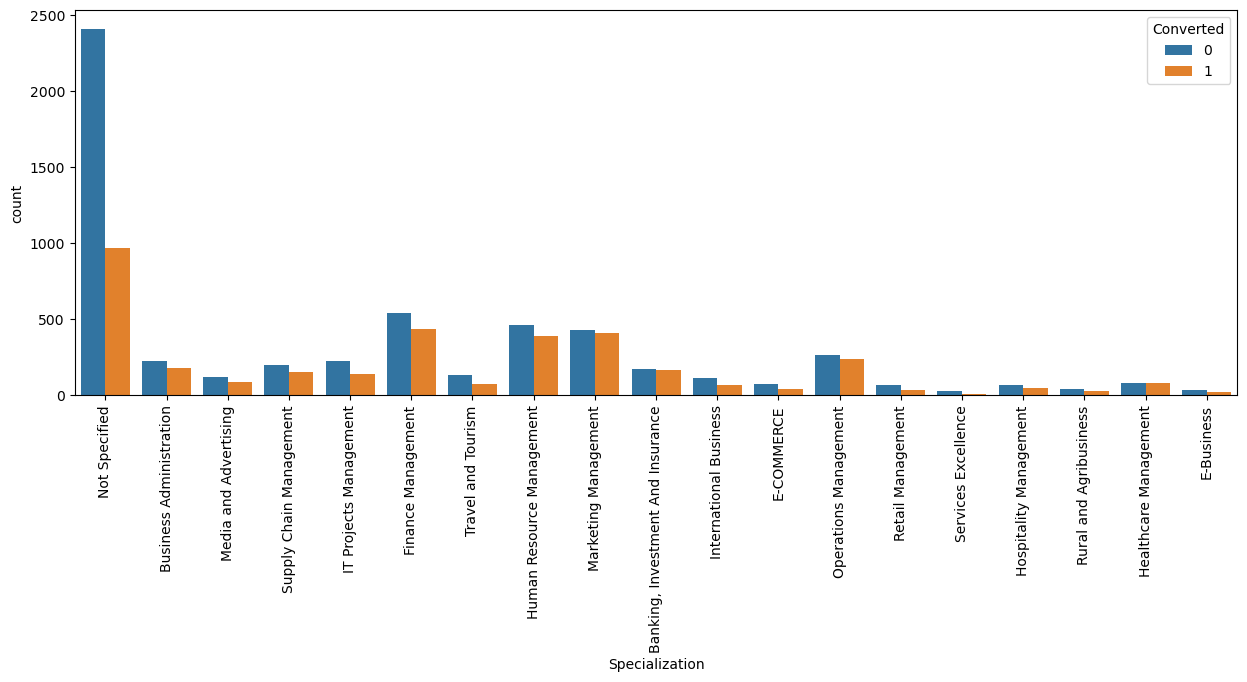

In [26]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(leads_1.Specialization, hue=leads_1.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

#We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [27]:
#combining Management Specializations because they show similar trends

leads_1['Specialization'] = leads_1['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

In [28]:
#imputing Nan values with mode "Unemployed"

leads_1['What is your current occupation'] = leads_1['What is your current occupation'].replace(np.nan, 'Unemployed')

In [29]:
#replacing Nan values with "Not Specified"
leads_1['Tags'] = leads_1['Tags'].replace(np.nan,'Not Specified')

In [30]:
#replacing tags with low frequency with "Other Tags"
leads_1['Tags'] = leads_1['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads_1['Tags'] = leads_1['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

In [31]:
round(100*(leads_1.isnull().sum()/len(leads_1.index)), 2)

Lead Origin                               0.00
Lead Source                               0.39
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
Receive More Updates About Our Courses    0.00
Tags                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float64

In [32]:
leads_1.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Receive More Updates About Our Courses,Tags,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,No,Interested in other courses,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,No,Ringing,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,No,Will revert after reading the email,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Ringing,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,No,Will revert after reading the email,No,Modified


## Dummy vriable creation


In [33]:
#check object columns
temp=leads_1.loc[:, leads_1.dtypes=='object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'Receive More Updates About Our Courses', 'Tags',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [34]:
#create dummys
dummy = pd.get_dummies(leads_1[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'Receive More Updates About Our Courses', 'Tags',
       'A free copy of Mastering The Interview',]],drop_first=True)
leads_1 =pd.concat([leads_1,dummy],axis=1)

In [35]:
leads_1 = leads_1.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'Receive More Updates About Our Courses', 'Tags',
       'A free copy of Mastering The Interview',],1)

C:\Users\kuldi\AppData\Local\Temp\ipykernel_23776\3165122538.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  leads_1 = leads_1.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',


In [36]:
#checking percentage of missing values
round(100*(leads_1.isnull().sum()/len(leads_1.index)),)

Converted                                     0.0
TotalVisits                                   1.0
Total Time Spent on Website                   0.0
Page Views Per Visit                          1.0
Last Notable Activity                         0.0
                                             ... 
Tags_Not Specified                            0.0
Tags_Other_Tags                               0.0
Tags_Ringing                                  0.0
Tags_Will revert after reading the email      0.0
A free copy of Mastering The Interview_Yes    0.0
Length: 68, dtype: float64

In [37]:
leads_1['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [38]:
#clubbing lower frequency values

leads_1['Last Notable Activity'] = leads_1['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

In [39]:
leads_1['Last Notable Activity'].value_counts()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

In [40]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leads_1['Converted'])/len(leads_1['Converted'].index))*100
Converted

38.53896103896104

In [41]:
#checking missing values in leftover columns/

round(100*(leads_1.isnull().sum()/len(leads_1.index)),2)

Converted                                     0.00
TotalVisits                                   1.48
Total Time Spent on Website                   0.00
Page Views Per Visit                          1.48
Last Notable Activity                         0.00
                                              ... 
Tags_Not Specified                            0.00
Tags_Other_Tags                               0.00
Tags_Ringing                                  0.00
Tags_Will revert after reading the email      0.00
A free copy of Mastering The Interview_Yes    0.00
Length: 68, dtype: float64

In [42]:
#checking percentile values for "Total Visits"

leads_1['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

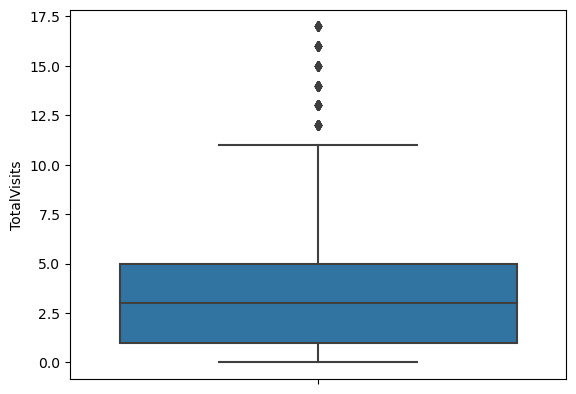

In [43]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads_1.TotalVisits.quantile(0.99)
leads_1 = leads_1[(leads_1.TotalVisits <= Q3)]
Q1 = leads_1.TotalVisits.quantile(0.01)
leads_1 = leads_1[(leads_1.TotalVisits >= Q1)]
sns.boxplot(y=leads_1['TotalVisits'])
plt.show()

In [44]:
#checking spread of "Page Views Per Visit"

leads_1['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

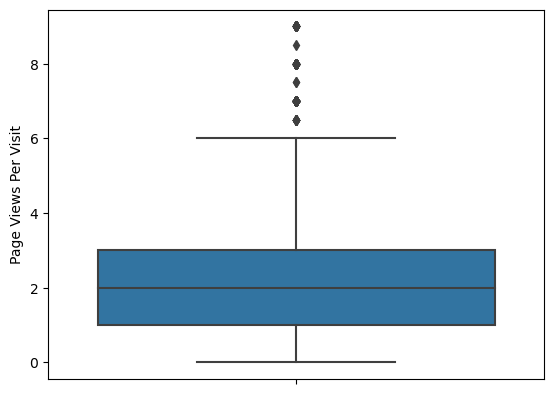

In [45]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = leads_1['Page Views Per Visit'].quantile(0.99)
leads_1 = leads_1[leads_1['Page Views Per Visit'] <= Q3]
Q1 = leads_1['Page Views Per Visit'].quantile(0.01)
leads_1 = leads_1[leads_1['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads_1['Page Views Per Visit'])
plt.show()

In [46]:
round(100*(leads_1.isnull().sum()/len(leads_1.index)),2)

Converted                                     0.0
TotalVisits                                   0.0
Total Time Spent on Website                   0.0
Page Views Per Visit                          0.0
Last Notable Activity                         0.0
                                             ... 
Tags_Not Specified                            0.0
Tags_Other_Tags                               0.0
Tags_Ringing                                  0.0
Tags_Will revert after reading the email      0.0
A free copy of Mastering The Interview_Yes    0.0
Length: 68, dtype: float64

In [47]:
#getting a list of categorical columns

cat_cols= leads_1.select_dtypes(include=['object']).columns
cat_cols

Index(['Last Notable Activity'], dtype='object')

In [48]:
dummy = pd.get_dummies(leads_1['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
leads_1 = pd.concat([leads_1, dummy], axis = 1)

C:\Users\kuldi\AppData\Local\Temp\ipykernel_23776\349910753.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)


In [49]:
#dropping the original columns after dummy variable creation

leads_1.drop(cat_cols,1,inplace = True)

C:\Users\kuldi\AppData\Local\Temp\ipykernel_23776\507830095.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  leads_1.drop(cat_cols,1,inplace = True)


In [50]:
leads_1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,...,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [51]:
## Test-Train split
from sklearn.model_selection import train_test_split

In [52]:
X=leads_1.drop(['Converted'],1)
X.head()

C:\Users\kuldi\AppData\Local\Temp\ipykernel_23776\1797847296.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=leads_1.drop(['Converted'],1)


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,0
3,1.0,305,1.0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


In [53]:
y=leads_1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [54]:
#split the dataset into 70% train and 30% test
X_train, X_test, y_train ,y_test =train_test_split(X,y,test_size=0.3,random_state=42)

## Scalling

In [55]:
#scalling the numeric variable.
from sklearn.preprocessing import MinMaxScaler

In [56]:
scaler= MinMaxScaler()
X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']]= scaler.fit_transform(X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])

In [57]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3385,0.117647,0.127201,0.222222,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2273,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4234,0.235294,0.048856,0.444444,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
945,0.176471,0.182658,0.333333,0,0,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
8689,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## looking at correlations

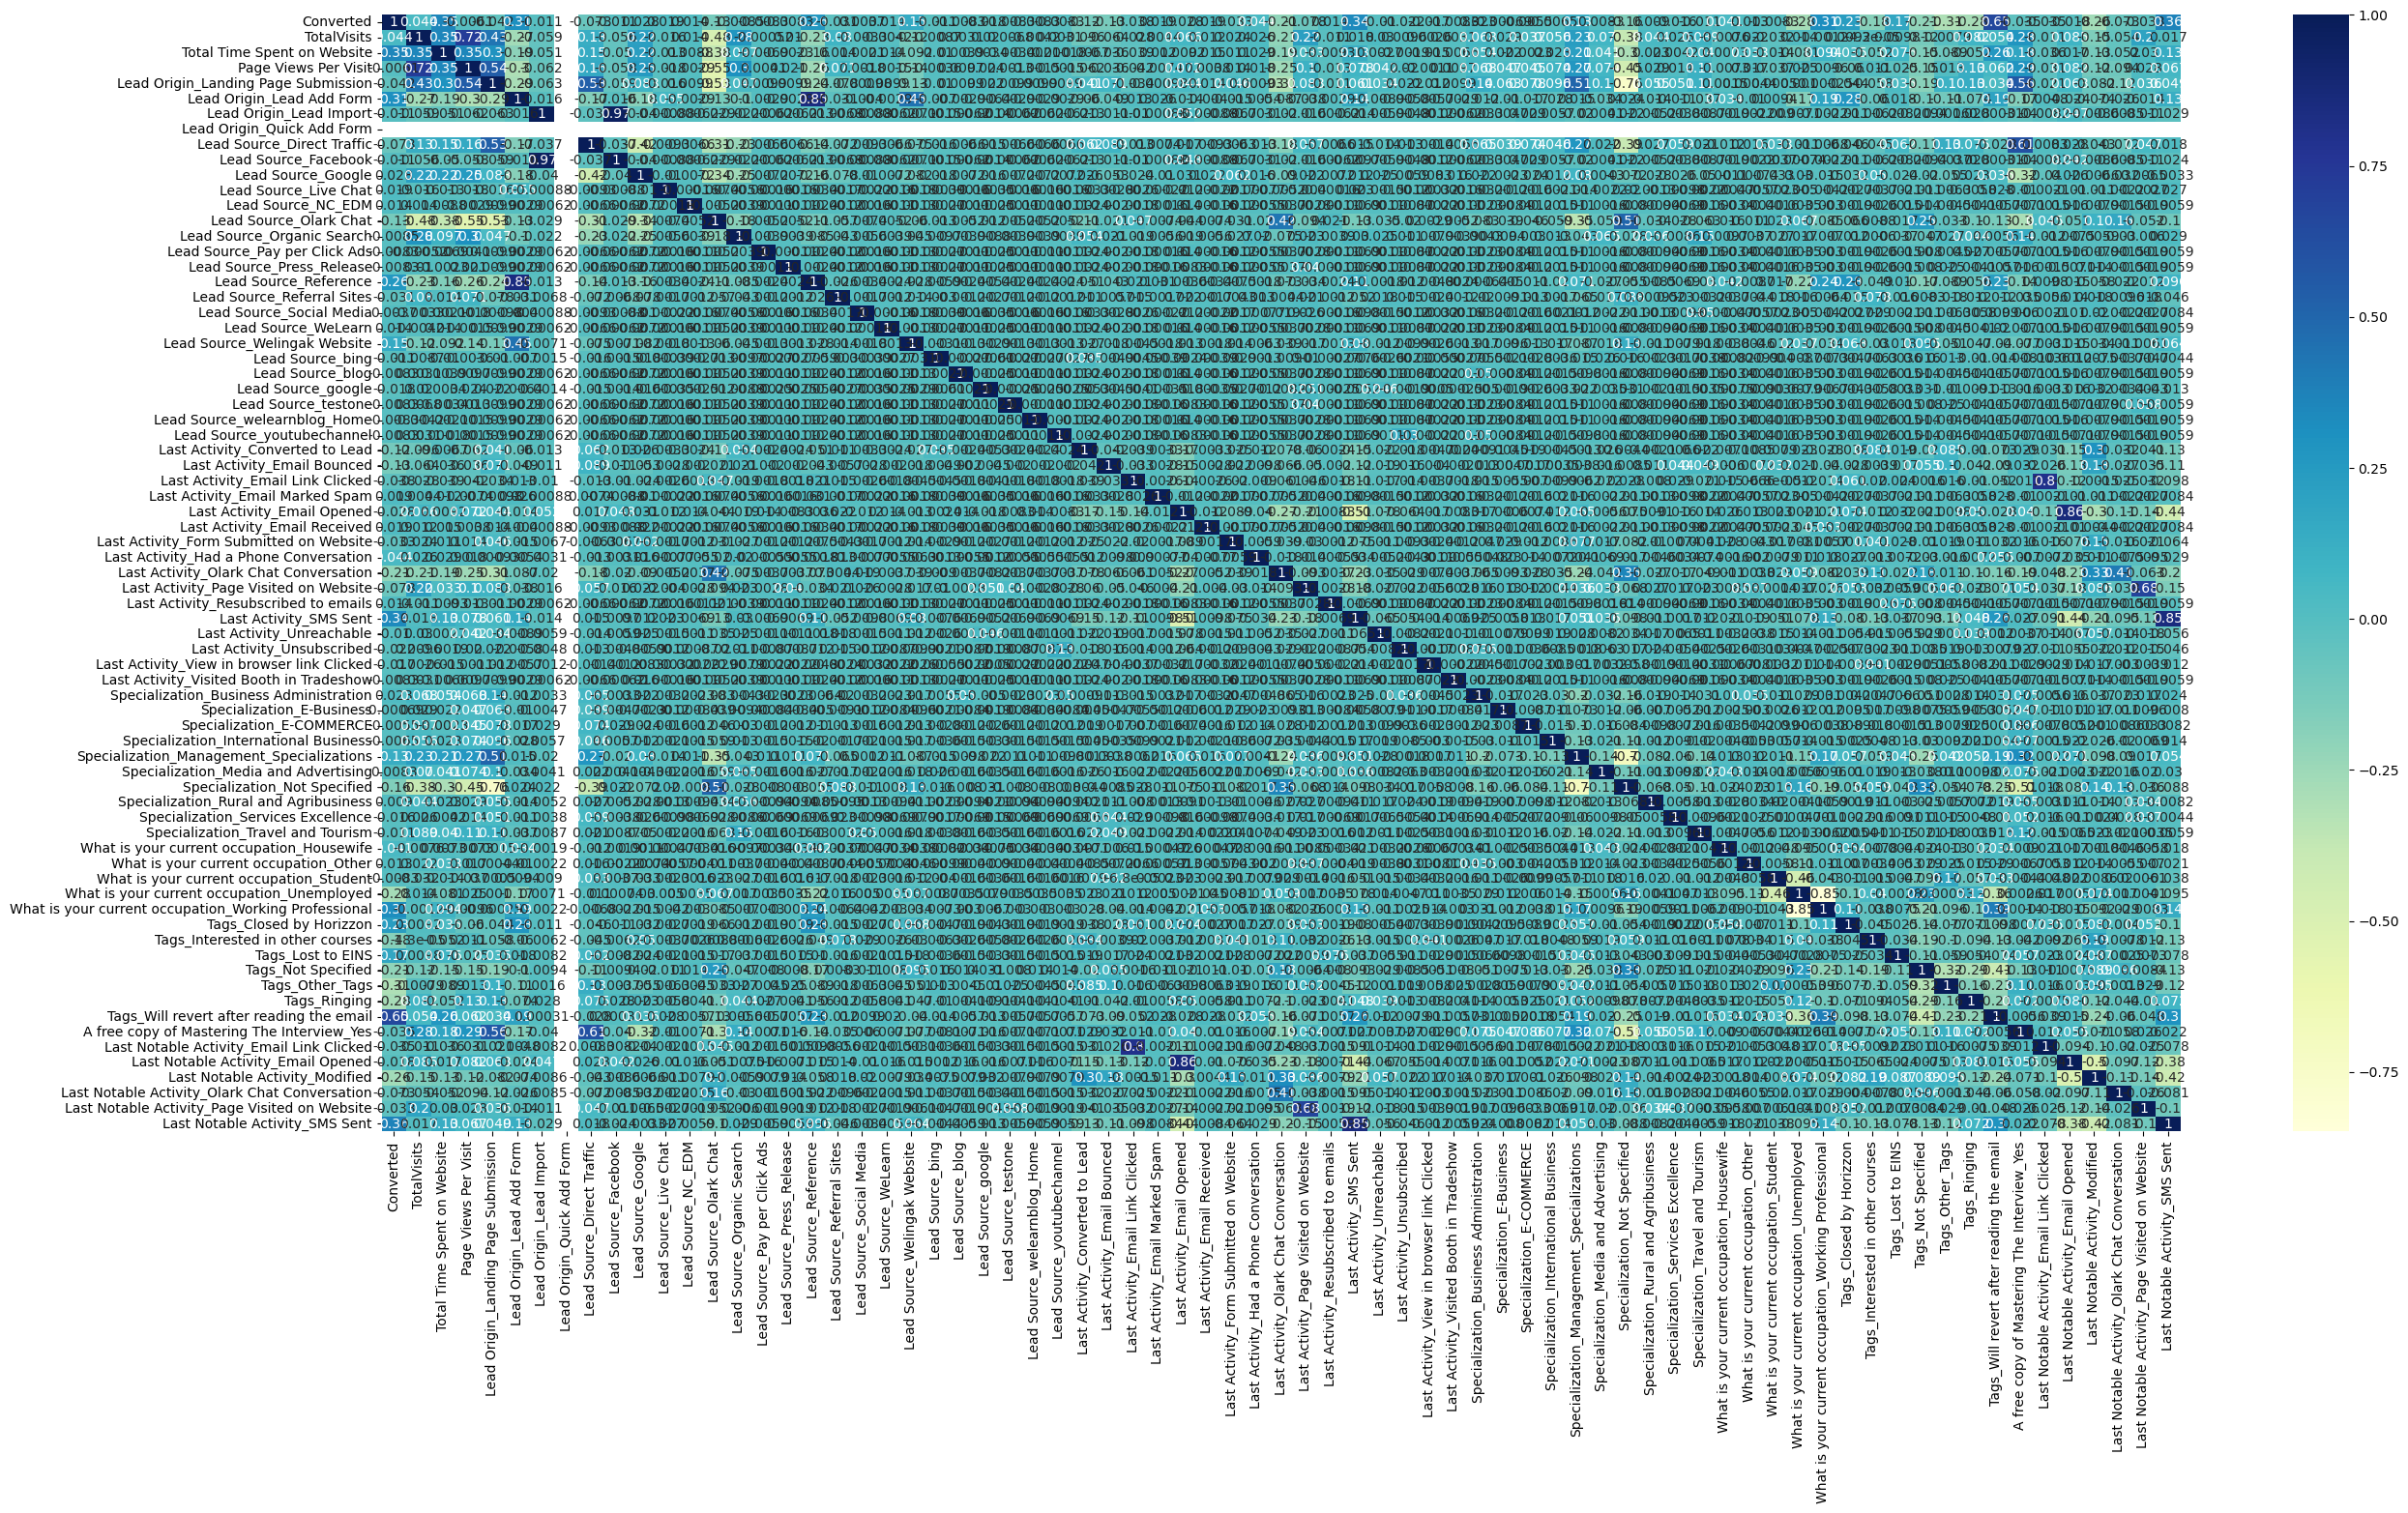

In [110]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(30,15))

# heatmap
sns.heatmap(leads_1.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Model Bulding

In [59]:
import statsmodels.api as sm

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
logreg = LogisticRegression()



In [61]:
rfe = RFE(logreg,n_features_to_select= 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [62]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Not Specified', 'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [63]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1240.4
Date:                Wed, 16 Aug 2023   Deviance:                       2480.9
Time:                        21:00:51   Pearson chi2:                 9.25e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6083
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8888      0.241     -3.691      0.000      -1.361      -0.417
Total Time Spent on Website                       4.0247      0.230     17.485      0.000       3.574       4.476
Lead Origin_Landing Page Submission              -1.0718      0.120     -8.938      0.000      -1.307      -0.837
Lead Origin_Lead Add Form                         1.1425      0.411      2.777      0.005       0.336       1.949
Lead Source_Welingak Website                      3.9323      1.100      3.576      0.000       1.777       6.088
Last Activity_SMS Sent                            1.3838      0.232      5.973      0.000       0.930       1.838
Tags_Closed by Horizzon                           6.4972      1.039      6.251      0.000       4.460       8.534
Tags_Interested in other courses                 -2.5681      0.415     -6.194      0.000      -3.381      -1.756
Tags_Lost to EINS                                 5.5793      0.760      7.340      0.000       4.089       7.069
Tags_Not Specified                               -0.7790      0.225     -3.462      0.001      -1.220      -0.338
Tags_Other_Tags                                  -3.4030      0.303    -11.245      0.000      -3.996      -2.810
Tags_Ringing                                     -4.1672      0.311    -13.407      0.000      -4.776      -3.558
Tags_Will revert after reading the email          3.7182      0.276     13.466      0.000       3.177       4.259
Last Notable Activity_Modified                   -1.5108      0.152     -9.958      0.000      -1.808      -1.213
Last Notable Activity_Olark Chat Conversation    -1.4597      0.410     -3.560      0.000      -2.263      -0.656
Last Notable Activity_SMS Sent                    0.7846      0.265      2.965      0.003       0.266       1.303
=================================================================================================================
"""

In [64]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1240.4
Date:                Wed, 16 Aug 2023   Deviance:                       2480.9
Time:                        21:00:51   Pearson chi2:                 9.25e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6083
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8888      0.241     -3.691      0.000      -1.361      -0.417
Total Time Spent on Website                       4.0247      0.230     17.485      0.000       3.574       4.476
Lead Origin_Landing Page Submission              -1.0718      0.120     -8.938      0.000      -1.307      -0.837
Lead Origin_Lead Add Form                         1.1425      0.411      2.777      0.005       0.336       1.949
Lead Source_Welingak Website                      3.9323      1.100      3.576      0.000       1.777       6.088
Last Activity_SMS Sent                            1.3838      0.232      5.973      0.000       0.930       1.838
Tags_Closed by Horizzon                           6.4972      1.039      6.251      0.000       4.460       8.534
Tags_Interested in other courses                 -2.5681      0.415     -6.194      0.000      -3.381      -1.756
Tags_Lost to EINS                                 5.5793      0.760      7.340      0.000       4.089       7.069
Tags_Not Specified                               -0.7790      0.225     -3.462      0.001      -1.220      -0.338
Tags_Other_Tags                                  -3.4030      0.303    -11.245      0.000      -3.996      -2.810
Tags_Ringing                                     -4.1672      0.311    -13.407      0.000      -4.776      -3.558
Tags_Will revert after reading the email          3.7182      0.276     13.466      0.000       3.177       4.259
Last Notable Activity_Modified                   -1.5108      0.152     -9.958      0.000      -1.808      -1.213
Last Notable Activity_Olark Chat Conversation    -1.4597      0.410     -3.560      0.000      -2.263      -0.656
Last Notable Activity_SMS Sent                    0.7846      0.265      2.965      0.003       0.266       1.303
=================================================================================================================
"""

##Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [65]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_SMS Sent,6.48
4,Last Activity_SMS Sent,6.19
1,Lead Origin_Landing Page Submission,2.63
11,Tags_Will revert after reading the email,2.35
12,Last Notable Activity_Modified,2.29
0,Total Time Spent on Website,2.27
8,Tags_Not Specified,2.09
2,Lead Origin_Lead Add Form,1.85
9,Tags_Other_Tags,1.60
10,Tags_Ringing,1.48


In [67]:
#There is a high correlation between two variables so we drop the variable with the higher valued VIF value
#dropping variable with high VIF

col = col.drop('Last Notable Activity_SMS Sent',1)

In [68]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1244.9
Date:                Wed, 16 Aug 2023   Deviance:                       2489.8
Time:                        21:00:52   Pearson chi2:                 9.50e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6078
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.8007      0.236     -3.397      0.001      -1.263      -0.339
Total Time Spent on Website                       4.0037      0.230     17.440      0.000       3.554       4.454
Lead Origin_Landing Page Submission              -1.0872      0.119     -9.139      0.000      -1.320      -0.854
Lead Origin_Lead Add Form                         1.1225      0.414      2.709      0.007       0.310       1.935
Lead Source_Welingak Website                      3.9368      1.104      3.568      0.000       1.774       6.100
Last Activity_SMS Sent                            1.9761      0.116     16.983      0.000       1.748       2.204
Tags_Closed by Horizzon                           6.6384      1.040      6.386      0.000       4.601       8.676
Tags_Interested in other courses                 -2.5321      0.411     -6.154      0.000      -3.339      -1.726
Tags_Lost to EINS                                 5.7038      0.761      7.493      0.000       4.212       7.196
Tags_Not Specified                               -0.7967      0.222     -3.589      0.000      -1.232      -0.362
Tags_Other_Tags                                  -3.3638      0.299    -11.236      0.000      -3.951      -2.777
Tags_Ringing                                     -4.0899      0.307    -13.339      0.000      -4.691      -3.489
Tags_Will revert after reading the email          3.7681      0.276     13.645      0.000       3.227       4.309
Last Notable Activity_Modified                   -1.7807      0.127    -14.041      0.000      -2.029      -1.532
Last Notable Activity_Olark Chat Conversation    -1.5280      0.410     -3.728      0.000      -2.331      -0.725
=================================================================================================================
"""

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Landing Page Submission,2.62
0,Total Time Spent on Website,2.27
11,Tags_Will revert after reading the email,2.26
8,Tags_Not Specified,2.02
2,Lead Origin_Lead Add Form,1.85
12,Last Notable Activity_Modified,1.84
4,Last Activity_SMS Sent,1.62
9,Tags_Other_Tags,1.55
10,Tags_Ringing,1.44
5,Tags_Closed by Horizzon,1.36


In [70]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3385    0.018779
2273    0.999220
4234    0.374507
945     0.002625
8689    0.034463
3142    0.032985
6033    0.022968
2350    0.004002
3490    0.000802
5066    0.007714
dtype: float64

In [71]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.87787132e-02, 9.99220152e-01, 3.74506852e-01, 2.62514105e-03,
       3.44626277e-02, 3.29849821e-02, 2.29683461e-02, 4.00176713e-03,
       8.01975569e-04, 7.71397098e-03])

In [72]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.018779,3385
1,1,0.999220,2273
2,0,0.374507,4234
3,0,0.002625,945
4,0,0.034463,8689


In [73]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.018779,3385,0
1,1,0.999220,2273,1
2,0,0.374507,4234,0
3,0,0.002625,945,0
4,0,0.034463,8689,0


In [74]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3676  176]
 [ 281 2134]]


In [75]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9270783468964416


In [76]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [77]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

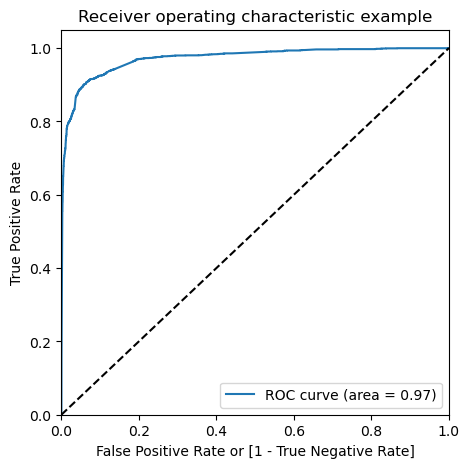

In [78]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

#The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

#Finding Optimal Cutoff Point
Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [79]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.018779,3385,0,1,0,0,0,0,0,0,0,0,0
1,1,0.999220,2273,1,1,1,1,1,1,1,1,1,1,1
2,0,0.374507,4234,0,1,1,1,1,0,0,0,0,0,0
3,0,0.002625,945,0,1,0,0,0,0,0,0,0,0,0
4,0,0.034463,8689,0,1,0,0,0,0,0,0,0,0,0


In [80]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385352  1.000000  0.000000
0.1   0.1  0.839317  0.975155  0.754154
0.2   0.2  0.902505  0.933333  0.883178
0.3   0.3  0.920855  0.915114  0.924455
0.4   0.4  0.925802  0.897723  0.943406
0.5   0.5  0.927078  0.883644  0.954309
0.6   0.6  0.915590  0.835197  0.965992
0.7   0.7  0.911441  0.807453  0.976636
0.8   0.8  0.905537  0.776398  0.986501
0.9   0.9  0.886229  0.719669  0.990654


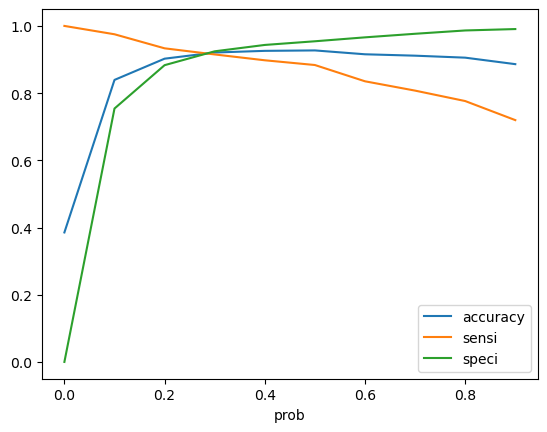

In [81]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [82]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.018779,3385,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.999220,2273,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.374507,4234,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.002625,945,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.034463,8689,0,1,0,0,0,0,0,0,0,0,0,0


In [83]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.018779,3385,0,2
1,1,0.999220,2273,1,100
2,0,0.374507,4234,1,37
3,0,0.002625,945,0,0
4,0,0.034463,8689,0,3


In [84]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9208552736556566

In [85]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
5098,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4535,0.117647,0.318182,0.222222,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3190,0.235294,0.765550,0.444444,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7457,0.294118,0.092344,0.555556,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6974,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [86]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
5098,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,1
4535,0.318182,1,0,0,1,0,0,0,1,0,0,0,0,0
3190,0.765550,0,0,0,1,0,0,0,1,0,0,0,0,0
7457,0.092344,0,0,0,0,0,0,0,0,1,0,0,1,0
6974,0.000000,0,0,0,1,0,0,0,0,0,0,1,0,0


In [87]:
X_test_sm = sm.add_constant(X_test)

## PREDICTIONS ON TEST SET

In [88]:
y_test_pred = res.predict(X_test_sm)

In [89]:
y_test_pred[:10]

5098    0.042068
4535    0.637697
3190    0.969043
7457    0.003775
6974    0.992921
8329    0.168337
5759    0.168337
7151    0.032985
5989    0.047006
1152    0.047476
dtype: float64

In [90]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [91]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [92]:
# Let's see the head
y_pred_1.head()

,0
5098,0.042068
4535,0.637697
3190,0.969043
7457,0.003775
6974,0.992921


In [93]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [94]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [95]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [96]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [97]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,5098,0.042068
1,1,4535,0.637697
2,1,3190,0.969043
3,0,7457,0.003775
4,1,6974,0.992921


In [98]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [99]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,5098,0.042068
1,1,4535,0.637697
2,1,3190,0.969043
3,0,7457,0.003775
4,1,6974,0.992921


In [100]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [101]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,5098,0,0.042068,4
1,4535,1,0.637697,64
2,3190,1,0.969043,97
3,7457,0,0.003775,0
4,6974,1,0.992921,99


In [102]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [103]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,5098,0,0.042068,4,0
1,4535,1,0.637697,64,1
2,3190,1,0.969043,97,1
3,7457,0,0.003775,0,0
4,6974,1,0.992921,99,1


In [104]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9218168279970216

In [105]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1563,  143],
       [  67,  913]], dtype=int64)

In [106]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [107]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9316326530612244

In [108]:
# Let us calculate specificity
TN / float(TN+FP)

0.9161781946072685